#Read The Dataset from specific link

In [1]:
!wget "https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-train.txt"
!wget "https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-dev.txt"
!wget "https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-test-tweets.txt"
#labels for test
!wget "https://alt.qcri.org/resources1/OSACT2022/OSACT2022-sharedTask-test-taskB-gold-labels.txt"

--2024-08-24 16:50:55--  https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-train.txt
Resolving alt.qcri.org (alt.qcri.org)... 37.186.61.205
Connecting to alt.qcri.org (alt.qcri.org)|37.186.61.205|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://alt.qcri.org/resources1/OSACT2022/OSACT2022-sharedTask-train.txt [following]
--2024-08-24 16:50:55--  http://alt.qcri.org/resources1/OSACT2022/OSACT2022-sharedTask-train.txt
Connecting to alt.qcri.org (alt.qcri.org)|37.186.61.205|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://alt.qcri.org/resources1/OSACT2022/OSACT2022-sharedTask-train.txt [following]
--2024-08-24 16:50:56--  https://alt.qcri.org/resources1/OSACT2022/OSACT2022-sharedTask-train.txt
Connecting to alt.qcri.org (alt.qcri.org)|37.186.61.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1502506 (1.4M) [text/plain]
Saving to: ‘OSACT2022-sharedTask-train.txt’



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.isri import ISRIStemmer
import string
import re
from bs4 import BeautifulSoup
nltk.download('stopwords')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
train_data = pd.read_csv("OSACT2022-sharedTask-train.txt", sep="\t", quoting=csv.QUOTE_NONE)
dev_data = pd.read_csv("OSACT2022-sharedTask-dev.txt", sep="\t", quoting=csv.QUOTE_NONE)
test_data = pd.read_csv("OSACT2022-sharedTask-test-tweets.txt", sep="\t", quoting=csv.QUOTE_NONE)

train_data

,1,@USER ردينا ع التطنز 😏👊🏻,OFF,NOT_HS,NOT_VLG,NOT_VIO
0,2,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
1,3,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,OFF,NOT_HS,NOT_VLG,NOT_VIO
2,4,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
3,5,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
4,6,حمدلله ماحطها في فمي اساسا😷🤢 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
...,...,...,...,...,...,...
8881,8883,@USER الله يلعنهم 🤢,OFF,NOT_HS,NOT_VLG,NOT_VIO
8882,8884,واحد سال زوجته بعد كم سنة زواج:<LF>- حبيبتي كم...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8883,8885,@USER يالله روح زي الشاطر واحذف الشو الي سويته...,OFF,NOT_HS,NOT_VLG,NOT_VIO
8884,8886,لـمـا الـكـلاب تـهـوهـو عـلـيـك🐶🐶 وأنـت_اللـى_...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   1                         8886 non-null   int64 
 1   @USER ردينا ع التطنز 😏👊🏻  8886 non-null   object
 2   OFF                       8886 non-null   object
 3   NOT_HS                    8886 non-null   object
 4   NOT_VLG                   8886 non-null   object
 5   NOT_VIO                   8886 non-null   object
dtypes: int64(1), object(5)
memory usage: 416.7+ KB


In [5]:
train_data.shape

(8886, 6)

In [6]:
train_data.NOT_HS.value_counts()

,count
NOT_HS,
NOT_HS,7927
HS6,456
HS1,260
HS3,144
HS5,72
HS2,27


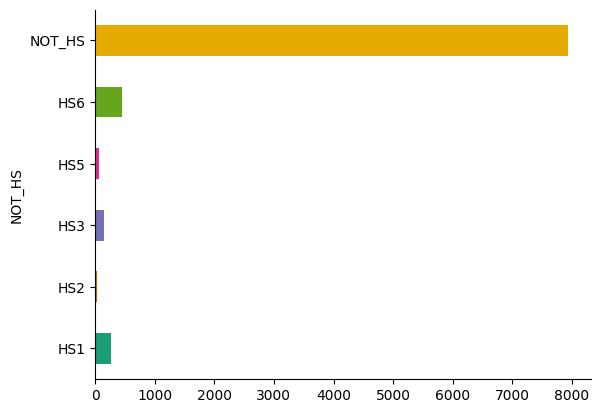

In [7]:
train_data.groupby('NOT_HS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
train_data = train_data.drop(columns=['1', 'OFF', 'NOT_VLG' , 'NOT_VIO'])

In [9]:
train_data

,@USER ردينا ع التطنز 😏👊🏻,NOT_HS
0,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_HS
1,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,NOT_HS
2,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_HS
3,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_HS
4,حمدلله ماحطها في فمي اساسا😷🤢 URL,NOT_HS
...,...,...
8881,@USER الله يلعنهم 🤢,NOT_HS
8882,واحد سال زوجته بعد كم سنة زواج:<LF>- حبيبتي كم...,NOT_HS
8883,@USER يالله روح زي الشاطر واحذف الشو الي سويته...,NOT_HS
8884,لـمـا الـكـلاب تـهـوهـو عـلـيـك🐶🐶 وأنـت_اللـى_...,NOT_HS


In [10]:
train_data = train_data.rename(columns={"@USER ردينا ع التطنز 😏👊🏻": "Text"})
train_data = train_data.rename(columns={"NOT_HS": "label"})
train_data


,Text,label
0,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_HS
1,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,NOT_HS
2,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_HS
3,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_HS
4,حمدلله ماحطها في فمي اساسا😷🤢 URL,NOT_HS
...,...,...
8881,@USER الله يلعنهم 🤢,NOT_HS
8882,واحد سال زوجته بعد كم سنة زواج:<LF>- حبيبتي كم...,NOT_HS
8883,@USER يالله روح زي الشاطر واحذف الشو الي سويته...,NOT_HS
8884,لـمـا الـكـلاب تـهـوهـو عـلـيـك🐶🐶 وأنـت_اللـى_...,NOT_HS


In [11]:
train_data.isnull().sum()

,0
Text,0
label,0


In [12]:
train_data.duplicated().sum()

0

In [13]:
dev_data

,8888,@USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
0,8889,#داليا_مبارك<LF>مادري ليش تقرفت😷,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
1,8890,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
2,8891,@USER هييه والله وااايدد 🔪🔪🔪💔💔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
3,8892,اكيد اخس شي 😤 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
4,8893,مابي شي الحين غير فراشي😣,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
...,...,...,...,...,...,...
1264,10153,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
1265,10154,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,OFF,NOT_HS,NOT_VLG,NOT_VIO
1266,10155,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,OFF,NOT_HS,NOT_VLG,NOT_VIO
1267,10156,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,OFF,NOT_HS,NOT_VLG,NOT_VIO


In [14]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   8888                                             1269 non-null   int64 
 1   @USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂  1269 non-null   object
 2   NOT_OFF                                          1269 non-null   object
 3   NOT_HS                                           1269 non-null   object
 4   NOT_VLG                                          1269 non-null   object
 5   NOT_VIO                                          1269 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.6+ KB


In [15]:
dev_data = dev_data.drop(columns=['8888', 'NOT_OFF', 'NOT_VLG' , 'NOT_VIO'])

In [16]:
dev_data = dev_data.rename(columns={"@USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂": "Text"})
dev_data = dev_data.rename(columns={"NOT_HS": "label"})
dev_data


,Text,label
0,#داليا_مبارك<LF>مادري ليش تقرفت😷,NOT_HS
1,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,NOT_HS
2,@USER هييه والله وااايدد 🔪🔪🔪💔💔,NOT_HS
3,اكيد اخس شي 😤 URL,NOT_HS
4,مابي شي الحين غير فراشي😣,NOT_HS
...,...,...
1264,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,NOT_HS
1265,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,NOT_HS
1266,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,NOT_HS
1267,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,NOT_HS


In [17]:
test_data

,10158,@USER هتهزر معايا ولا ايه 😡😡😡😡
0,10159,مشفتش العرض بتاعهم لا مش مهتمة لا😩🐸😂 URL
1,10160,RT @USER عندما تكون لوحدك تحس انك لحالك صح 😊<L...
2,10161,RT @USER ماشاء الله الرجال باين عليه محترم <LF...
3,10162,@USER شسالفة احد يفهمني 😤
4,10163,@USER اقووووول استريح عاد احتفالاتنا تحط اغاني...
...,...,...
2535,12694,قله حيا وين اهلهم ذولي الله لايبلانا لهالدرجه ...
2536,12695,RT @USER ثم الطحلبه🐸🐸🐸 URL
2537,12696,يا وجه الله 😷 من اليوم ورايح شاورما انسى 🔪 URL
2538,12697,@USER متخلف حتى الحلال حرمتوه 😷


In [18]:
test_data = test_data.drop(columns=['10158'])

In [19]:
test_data = test_data.rename(columns={"@USER هتهزر معايا ولا ايه 😡😡😡😡": "Text"})
test_data

,Text
0,مشفتش العرض بتاعهم لا مش مهتمة لا😩🐸😂 URL
1,RT @USER عندما تكون لوحدك تحس انك لحالك صح 😊<L...
2,RT @USER ماشاء الله الرجال باين عليه محترم <LF...
3,@USER شسالفة احد يفهمني 😤
4,@USER اقووووول استريح عاد احتفالاتنا تحط اغاني...
...,...
2535,قله حيا وين اهلهم ذولي الله لايبلانا لهالدرجه ...
2536,RT @USER ثم الطحلبه🐸🐸🐸 URL
2537,يا وجه الله 😷 من اليوم ورايح شاورما انسى 🔪 URL
2538,@USER متخلف حتى الحلال حرمتوه 😷


In [20]:
test_labels = pd.read_csv("OSACT2022-sharedTask-test-taskB-gold-labels.txt", sep="\t", quoting=csv.QUOTE_NONE)
test_labels = test_labels.rename(columns={"NOT_HS": "label"})

In [21]:
test_data = test_data.join(test_labels)
test_data

,Text,label
0,مشفتش العرض بتاعهم لا مش مهتمة لا😩🐸😂 URL,NOT_HS
1,RT @USER عندما تكون لوحدك تحس انك لحالك صح 😊<L...,NOT_HS
2,RT @USER ماشاء الله الرجال باين عليه محترم <LF...,NOT_HS
3,@USER شسالفة احد يفهمني 😤,NOT_HS
4,@USER اقووووول استريح عاد احتفالاتنا تحط اغاني...,NOT_HS
...,...,...
2535,قله حيا وين اهلهم ذولي الله لايبلانا لهالدرجه ...,NOT_HS
2536,RT @USER ثم الطحلبه🐸🐸🐸 URL,NOT_HS
2537,يا وجه الله 😷 من اليوم ورايح شاورما انسى 🔪 URL,NOT_HS
2538,@USER متخلف حتى الحلال حرمتوه 😷,NOT_HS


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2540 non-null   object
 1   label   2540 non-null   object
dtypes: object(2)
memory usage: 39.8+ KB


In [23]:
# Alharbi, Alaa, and Mark Lee. "Kawarith: an Arabic Twitter Corpus for Crisis Events."
# Proceedings of the Sixth Arabic Natural Language Processing Workshop. 2021

!wget https://raw.githubusercontent.com/alaa-a-a/multi-dialect-arabic-stop-words/main/Stop-words/stop_list_1177.txt
arabic_stop_words = []
with open ('./stop_list_1177.txt',encoding='utf-8') as f :
    for word in f.readlines() :
        arabic_stop_words.append(word.split("\n")[0])

--2024-08-24 16:51:08--  https://raw.githubusercontent.com/alaa-a-a/multi-dialect-arabic-stop-words/main/Stop-words/stop_list_1177.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11468 (11K) [text/plain]
Saving to: ‘stop_list_1177.txt’

stop_list_1177.txt  100%[===================>]  11.20K  --.-KB/s    in 0s      

2024-08-24 16:51:08 (84.1 MB/s) - ‘stop_list_1177.txt’ saved [11468/11468]



In [24]:
tok = WordPunctTokenizer()

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text


def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)


def remove_punctuations(text):
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    english_punctuations = string.punctuation
    punctuations_list = arabic_punctuations + english_punctuations
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    # return re.sub(r'(.)\1+', r'\1', text)     # keep only 1 repeat
    return re.sub(r'(.)\1+', r'\1\1', text)  # keep 2 repeat

def remove_stop_words(text):
    word_list = nltk.tokenize.wordpunct_tokenize(text.lower())
    word_list = [ w for w in word_list if not w in arabic_stop_words]
    return (" ".join(word_list)).strip()



def remove_non_arabic_letters(text):
    text = re.sub(r'([@A-Za-z0-9_]+)|#|http\S+', ' ', text) # removes non arabic letters
    text = re.sub(r'ـــــــــــــ', '', text) # removes non arabic letters
    return text




def clean_str(text):
    text = remove_non_arabic_letters(text)
    text = remove_punctuations(text)
    text = remove_diacritics(text)
    text = remove_repeating_char(text)
    # text = remove_stop_words(text)

    # Extract text from HTML tags, especially when dealing with data from 𝕏 (Twitter)
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    combined_pat = r'|'.join((pat1, pat2))
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped

    words = tok.tokenize(clean)
    return (" ".join(words)).strip()

In [25]:
print("Cleaning and parsing the training dataset...\n")

train_data["Text"] = train_data["Text"].apply(lambda x: clean_str(x))

train_data.head()

Cleaning and parsing the training dataset...



,Text,label
0,وصارت فطاير البقالات غذاء صحي 👎🏻,NOT_HS
1,روحي لبريده تلقين اشباه كثير بس ماحد زيكم مشفو...,NOT_HS
2,مش باين حاجه خالص 😣 مش عارف بقى 😔,NOT_HS
3,اليوم الاثنين 👏 يقولك من المسلمين عندهم خاله ا...,NOT_HS
4,حمدلله ماحطها في فمي اساسا 😷🤢,NOT_HS


In [26]:
print("Cleaning and parsing the development dataset...\n")

dev_data["Text"] = dev_data["Text"].apply(lambda x: clean_str(x))

dev_data.head()

Cleaning and parsing the development dataset...



,Text,label
0,داليا مبارك مادري ليش تقرفت 😷,NOT_HS
1,ابديت السناب الجديد ❌ حاس الناس حوس أشوف مشاهي...,NOT_HS
2,هييه والله واايدد 🔪🔪💔💔,NOT_HS
3,اكيد اخس شي 😤,NOT_HS
4,مابي شي الحين غير فراشي 😣,NOT_HS


In [27]:
print("Cleaning and parsing the test dataset...\n")

test_data["Text"] = test_data["Text"].apply(lambda x: clean_str(x))

test_data.head()

Cleaning and parsing the test dataset...



,Text,label
0,مشفتش العرض بتاعهم لا مش مهتمة لا 😩🐸😂,NOT_HS
1,عندما تكون لوحدك تحس انك لحالك صح 😊 حتى انا مث...,NOT_HS
2,ماشاء الله الرجال باين عليه محترم البنات متى ت...,NOT_HS
3,شسالفة احد يفهمني 😤,NOT_HS
4,اقوول استريح عاد احتفالاتنا تحط اغانينا 😡😡,NOT_HS


In [28]:
label2id = {"NOT_HS": 0,
            "HS1": 1,
            "HS2": 1,
            "HS3": 1,
            "HS4": 1,
            "HS5": 1,
            "HS6": 1,
            "HS" : 1

            }
id2label = {0: "NOT_HS", 1: "HS"}

In [29]:
train_data['label'] = train_data['label'].apply(lambda x: label2id[x])
train_data=train_data[["Text", "label"]]
train_data.head()

,Text,label
0,وصارت فطاير البقالات غذاء صحي 👎🏻,0
1,روحي لبريده تلقين اشباه كثير بس ماحد زيكم مشفو...,0
2,مش باين حاجه خالص 😣 مش عارف بقى 😔,0
3,اليوم الاثنين 👏 يقولك من المسلمين عندهم خاله ا...,0
4,حمدلله ماحطها في فمي اساسا 😷🤢,0


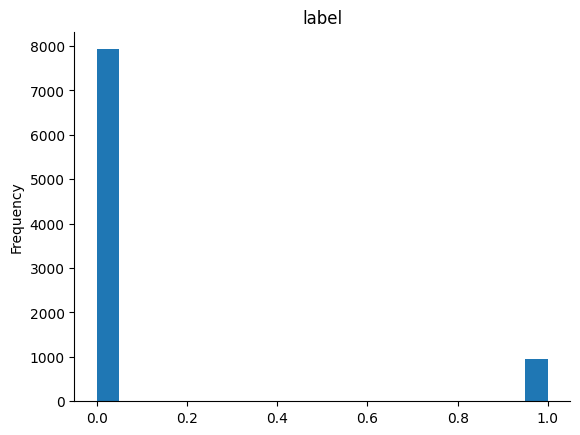

In [30]:

from matplotlib import pyplot as plt
train_data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
dev_data['label'] = dev_data['label'].apply(lambda x: label2id[x])
dev_data=dev_data[["Text", "label"]]
dev_data.head()

,Text,label
0,داليا مبارك مادري ليش تقرفت 😷,0
1,ابديت السناب الجديد ❌ حاس الناس حوس أشوف مشاهي...,0
2,هييه والله واايدد 🔪🔪💔💔,0
3,اكيد اخس شي 😤,0
4,مابي شي الحين غير فراشي 😣,0


In [32]:
test_data['label'] = test_data['label'].apply(lambda x: label2id[x])
test_data=test_data[["Text", "label"]]
test_data

,Text,label
0,مشفتش العرض بتاعهم لا مش مهتمة لا 😩🐸😂,0
1,عندما تكون لوحدك تحس انك لحالك صح 😊 حتى انا مث...,0
2,ماشاء الله الرجال باين عليه محترم البنات متى ت...,0
3,شسالفة احد يفهمني 😤,0
4,اقوول استريح عاد احتفالاتنا تحط اغانينا 😡😡,0
...,...,...
2535,قله حيا وين اهلهم ذولي الله لايبلانا لهالدرجه ...,0
2536,ثم الطحلبه 🐸🐸,0
2537,يا وجه الله 😷 من اليوم ورايح شاورما انسى 🔪,0
2538,متخلف حتى الحلال حرمتوه 😷,0


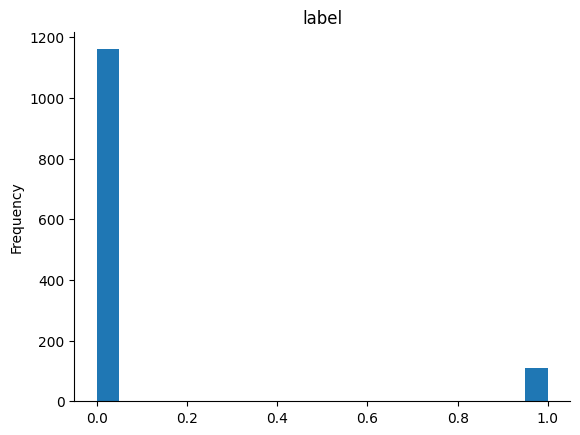

In [33]:
from matplotlib import pyplot as plt
dev_data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    8886 non-null   object
 1   label   8886 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.0+ KB


In [35]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = train_data[['Text']]
y = train_data['label']

print('Original class distribution:', Counter(y))

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

train_data_resampled = pd.DataFrame(X_resampled, columns=['Text'])
train_data_resampled['label'] = y_resampled

print('Resampled class distribution:', Counter(y_resampled))


Original class distribution: Counter({0: 7927, 1: 959})
Resampled class distribution: Counter({0: 7927, 1: 7927})


In [36]:
y_resampled.value_counts()

,count
label,
0,7927
1,7927


In [37]:
train_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    15854 non-null  object
 1   label   15854 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 247.8+ KB


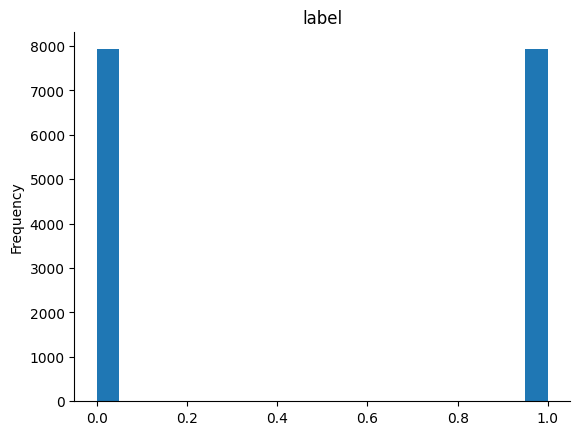

In [38]:
train_data_resampled['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right']].set_visible(False)


In [39]:
train_data_resampled.head()

,Text,label
0,وصارت فطاير البقالات غذاء صحي 👎🏻,0
1,روحي لبريده تلقين اشباه كثير بس ماحد زيكم مشفو...,0
2,مش باين حاجه خالص 😣 مش عارف بقى 😔,0
3,اليوم الاثنين 👏 يقولك من المسلمين عندهم خاله ا...,0
4,حمدلله ماحطها في فمي اساسا 😷🤢,0


In [40]:

from sklearn.model_selection import train_test_split

X_train = train_data_resampled['Text'].values
y_train = train_data_resampled['label'].values

X_val = dev_data['Text'].values
y_val = dev_data['label'].values



print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)


Training data shape: (15854,) (15854,)
Validation data shape: (1269,) (1269,)


In [41]:
train_text_lengths = [len(text.split()) for text in X_train]
max_length = max(train_text_lengths)

print("Maximum length of text:", max_length)

Maximum length of text: 59


#apply pipline for qarib bert model

In [42]:
# ! pip install transformers[torch]

In [43]:
import numpy as np

# to prepare dataset and calculate metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score , recall_score

from transformers import AutoConfig, BertForSequenceClassification, AutoTokenizer
from transformers.data.processors import SingleSentenceClassificationProcessor, InputFeatures
from transformers import Trainer , TrainingArguments

In [44]:
train_df = pd.DataFrame({
    'label':y_train,
    'text': X_train
    })

dev_df = pd.DataFrame({
    'label':y_val,
    'text': X_val
    })

test_df = pd.DataFrame({
    'label':test_data['label'],
    'text': test_data['Text']
    })


In [45]:


PREFIX_LIST = [
    "ال",
    "و",
    "ف",
    "ب",
    "ك",
    "ل",
    "لل",
    "\u0627\u0644",
    "\u0648",
    "\u0641",
    "\u0628",
    "\u0643",
    "\u0644",
    "\u0644\u0644",
    "س",
]
SUFFIX_LIST = [
    "ه",
    "ها",
    "ك",
    "ي",
    "هما",
    "كما",
    "نا",
    "كم",
    "هم",
    "هن",
    "كن",
    "ا",
    "ان",
    "ين",
    "ون",
    "وا",
    "ات",
    "ت",
    "ن",
    "ة",
    "\u0647",
    "\u0647\u0627",
    "\u0643",
    "\u064a",
    "\u0647\u0645\u0627",
    "\u0643\u0645\u0627",
    "\u0646\u0627",
    "\u0643\u0645",
    "\u0647\u0645",
    "\u0647\u0646",
    "\u0643\u0646",
    "\u0627",
    "\u0627\u0646",
    "\u064a\u0646",
    "\u0648\u0646",
    "\u0648\u0627",
    "\u0627\u062a",
    "\u062a",
    "\u0646",
    "\u0629",
]


# the never_split list is used with the transformers library
_PREFIX_SYMBOLS = [x + "+" for x in PREFIX_LIST]
_SUFFIX_SYMBOLS = ["+" + x for x in SUFFIX_LIST]
NEVER_SPLIT_TOKENS = list(set(_PREFIX_SYMBOLS + _SUFFIX_SYMBOLS))

In [46]:
model_name = "qarib/bert-base-qarib"
num_labels = 2  # HS & NOT_HS
config = AutoConfig.from_pretrained(model_name,num_labels=num_labels, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          do_lower_case=False,
                                          do_basic_tokenize=True,
                                          never_split=NEVER_SPLIT_TOKENS)
tokenizer.max_len = 64
model = BertForSequenceClassification.from_pretrained(model_name, config=config)

train_dataset = SingleSentenceClassificationProcessor(mode='classification')
dev_dataset = SingleSentenceClassificationProcessor(mode='classification')

train_dataset.add_examples(texts_or_text_and_labels=train_df['text'],labels=train_df['label'],overwrite_examples = True)
dev_dataset.add_examples(texts_or_text_and_labels=dev_df['text'],labels=dev_df['label'],overwrite_examples = True)
print(train_dataset.examples[0])

train_features = train_dataset.get_features(tokenizer = tokenizer, max_length =64)
dev_features = dev_dataset.get_features(tokenizer = tokenizer, max_length =64)
# print(config)

print(len(train_features))
print(len(dev_features))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/718k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at qarib/bert-base-qarib and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


InputExample(guid=None, text_a='وصارت فطاير البقالات غذاء صحي 👎🏻', text_b=None, label=0)
15854
1269


In [47]:
# adapted from https://github.com/aub-mind/arabert

def compute_metrics(p): #p should be of type EvalPrediction
    print(np.shape(p.predictions[0]))
    print(np.shape(p.predictions[1]))
    print(len(p.label_ids))
    preds = np.argmax(p.predictions[0], axis=1)
    assert len(preds) == len(p.label_ids)
    print(classification_report(p.label_ids,preds))
    print(confusion_matrix(p.label_ids,preds))

    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    macro_precision = precision_score(p.label_ids,preds,average='macro')
    macro_recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [48]:
! mkdir train

In [49]:
training_args = TrainingArguments("./train")
training_args.do_train = True
training_args.evaluate_during_training = True
training_args.adam_epsilon = 1e-8
training_args.learning_rate = 2e-5
training_args.warmup_steps = 0
training_args.per_device_train_batch_size = 16
training_args.per_device_eval_batch_size = 16
training_args.num_train_epochs = 3
training_args.logging_steps = 100
training_args.save_steps = 500
training_args.seed = 42
print(training_args.logging_steps)

100


In [50]:
# instantiate trainer
trainer = Trainer(model=model,
                  args = training_args,
                  train_dataset = train_features,
                  eval_dataset = dev_features,
                  compute_metrics = compute_metrics)
# start training
trainer.train()

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Step,Training Loss
100,0.403500
200,0.275300
300,0.237900
400,0.211100
500,0.161100
600,0.143700
700,0.136000
800,0.123900
900,0.109000
1000,0.094100


TrainOutput(global_step=2973, training_loss=0.07625906063908484, metrics={'train_runtime': 721.1178, 'train_samples_per_second': 65.956, 'train_steps_per_second': 4.123, 'total_flos': 1564261001879040.0, 'train_loss': 0.07625906063908484, 'epoch': 3.0})

In [51]:
trainer.evaluate()

(1269, 2)
(12, 1269, 12, 64, 64)
1269
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1160
           1       0.75      0.43      0.55       109

    accuracy                           0.94      1269
   macro avg       0.85      0.71      0.76      1269
weighted avg       0.93      0.94      0.93      1269

[[1144   16]
 [  62   47]]


{'eval_loss': 0.49510034918785095,
 'eval_macro_f1': 0.7567722974699718,
 'eval_macro_precision': 0.8473110637289742,
 'eval_macro_recall': 0.7086997785510915,
 'eval_accuracy': 0.9385342789598109,
 'eval_runtime': 13.2633,
 'eval_samples_per_second': 95.678,
 'eval_steps_per_second': 6.032,
 'epoch': 3.0}

In [52]:
from google.colab import drive
drive.mount('/content/drive')

import torch
torch.save(model.state_dict(), '/content/drive/MyDrive/model.pth')

Mounted at /content/drive


#Test code

In [53]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [54]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import tqdm

In [55]:
#load the model
device = torch.device('cpu')
model.load_state_dict(torch.load('/content/drive/MyDrive/model.pth' ,  map_location=device))


<All keys matched successfully>

In [56]:
print(torch.cuda.is_available())
device = "cuda" if torch.cuda.is_available() else "cpu"

test_dataset = SingleSentenceClassificationProcessor(mode='classification')

test_dataset.add_examples(texts_or_text_and_labels=test_df['text'],labels=test_df['label'],overwrite_examples = True)
print(test_dataset.examples[0])

test_features = test_dataset.get_features(tokenizer = tokenizer, max_length =64)


input_ids = [i.input_ids for i in test_features]
attention_masks = [i.attention_mask for i in test_features]

# Convert all of our data into torch tensors, the required datatype for our model
inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory
batch_size = 64
test_data = TensorDataset(inputs, masks)

# do not use shuffle, we need the preds to be in same order
test_dataloader = DataLoader(test_data, batch_size=batch_size)

True
InputExample(guid=None, text_a='مشفتش العرض بتاعهم لا مش مهتمة لا 😩🐸😂', text_b=None, label=0)


In [57]:
# Put the model in an evaluation state
model.eval()

# Transfer model to GPU
model.to(device)

outputs = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache() # empty the gpu memory

    # Transfer the batch to gpu
    input = input.to(device)
    masks = masks.to(device)

    # Run inference on the batch
    output = model(input, attention_mask=masks)["logits"]
    predictions = torch.argmax(output, dim=1)
    # Transfer the output to CPU again and convert to numpy
    predictions = predictions.cpu().detach().numpy()

    # Store the output in a list
    outputs.extend(predictions)

# Concatenate all the lists within the list into one list
output_labels = test_df["label"]

from sklearn.metrics import f1_score, classification_report

print(classification_report(test_df["label"].values, outputs, target_names=["NOT_HS", "HS"]))

              precision    recall  f1-score   support

      NOT_HS       0.95      0.99      0.97      2269
          HS       0.81      0.54      0.65       271

    accuracy                           0.94      2540
   macro avg       0.88      0.76      0.81      2540
weighted avg       0.93      0.94      0.93      2540



In [58]:
tweet = "من زمان ونحن ندعس بلدكم دعس "
# Preprocess the tweet
cleaned_tweet = clean_str(tweet)

# Tokenize the tweet
encoded_tweet = tokenizer.encode_plus(
    cleaned_tweet,
    None,
    add_special_tokens=True,
    max_length=64,
    padding='max_length',
    return_token_type_ids=False,
    truncation=True,
    return_tensors='pt'
)

# Move the input to the device
input_ids = encoded_tweet['input_ids'].to(device)
attention_mask = encoded_tweet['attention_mask'].to(device)

# Make the prediction
with torch.no_grad():
    output = model(input_ids, attention_mask=attention_mask)["logits"]
    prediction = torch.argmax(output, dim=1)

# Get the predicted label
predicted_label_id = prediction.item()
predicted_label = id2label[predicted_label_id]

print(f"Predicted Label for the tweet: {predicted_label}")


Predicted Label for the tweet: HS


In [59]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246566 sha256=a5697972031301d07466c1528a19786c8542691e8ea1f173cb9a0e2365ed2bbf
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [60]:
import fasttext
import fasttext.util
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-ar-vectors", filename="model.bin")
# model_path = "./fasttext-ar-vectors-150.bin"
model_fasttext = fasttext.load_model(model_path)
# model_fasttext = fasttext.util.reduce_model(model_fasttext, 150) # reduce embeddings dimension to 150 from 300; requires a huge memory notebook
# model_fasttext.save_model("/content/drive/MyDrive/Colab Notebooks/text-aml/hate-speech-ds/fasttext-ar-vectors-150.bin")
print(len(model_fasttext.words))
model_fasttext['bread'].shape

model.bin:   0%|          | 0.00/7.25G [00:00<?, ?B/s]

2000000


(300,)

In [61]:
import numpy as np

def adversarial_example(tweet, model_fasttext, model, tokenizer, label2id, id2label, num_perturbations=5, epsilon=0.1):
    """
    Generates an adversarial example for a given tweet.

    Args:
        tweet: The input tweet.
        model_fasttext: The fasttext word embeddings model.
        model: The fine-tuned BERT model.
        tokenizer: The tokenizer for the BERT model.
        label2id: Dictionary mapping labels to IDs.
        id2label: Dictionary mapping IDs to labels.
        num_perturbations: Number of words to perturb.
        epsilon: Magnitude of perturbation.

    Returns:
        The adversarial tweet, the original prediction, and the adversarial prediction.
    """

    # Preprocess the tweet
    cleaned_tweet = clean_str(tweet)

    # Tokenize the tweet
    encoded_tweet = tokenizer.encode_plus(
        cleaned_tweet,
        None,
        add_special_tokens=True,
        max_length=64,
        padding='max_length',
        return_token_type_ids=False,
        truncation=True,
        return_tensors='pt'
    )

    # Get original prediction
    input_ids = encoded_tweet['input_ids'].to(device)
    attention_mask = encoded_tweet['attention_mask'].to(device)
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)["logits"]
        original_prediction = torch.argmax(output, dim=1).item()

    # Get word embeddings for the tweet
    words = cleaned_tweet.split()
    word_embeddings = np.array([model_fasttext[word] for word in words if word in model_fasttext.words])

    # Find words to perturb (excluding special tokens)
    perturbable_indices = [i for i, word in enumerate(words) if word not in tokenizer.all_special_tokens]

    # Select words to perturb randomly
    indices_to_perturb = np.random.choice(perturbable_indices, size=min(num_perturbations, len(perturbable_indices)), replace=False)

    # Perturb the selected words
    for idx in indices_to_perturb:
        word = words[idx]
        perturbation = epsilon * np.random.randn(word_embeddings.shape[1])
        perturbed_embedding = word_embeddings[idx] + perturbation
        # Find nearest neighbor in embedding space (using the original word as input)
        nearest_neighbor = model_fasttext.get_nearest_neighbors(word, k=1)[0][1]  # Pass the word, not the embedding
        words[idx] = nearest_neighbor

    # Construct adversarial tweet
    adversarial_tweet = " ".join(words)

    # Get adversarial prediction
    encoded_adversarial_tweet = tokenizer.encode_plus(
        adversarial_tweet,
        None,
        add_special_tokens=True,
        max_length=64,
        padding='max_length',
        return_token_type_ids=False,
        truncation=True,
        return_tensors='pt'
    )
    input_ids = encoded_adversarial_tweet['input_ids'].to(device)
    attention_mask = encoded_adversarial_tweet['attention_mask'].to(device)
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)["logits"]
        adversarial_prediction = torch.argmax(output, dim=1).item()

    return adversarial_tweet, id2label[original_prediction], id2label[adversarial_prediction]

# Example usage:
tweet = "هذا البلد مليء بالكراهية والعنف."
adversarial_tweet, original_prediction, adversarial_prediction = adversarial_example(
    tweet, model_fasttext, model, tokenizer, label2id, id2label
)



In [62]:


!pip install gradio

import gradio as gr

def predict_tweet(tweet):
  # Preprocess the tweet
  cleaned_tweet = clean_str(tweet)

  # Tokenize the tweet
  encoded_tweet = tokenizer.encode_plus(
      cleaned_tweet,
      None,
      add_special_tokens=True,
      max_length=64,
      padding='max_length',
      return_token_type_ids=False,
      truncation=True,
      return_tensors='pt'
  )

  # Move the input to the device
  input_ids = encoded_tweet['input_ids'].to(device)
  attention_mask = encoded_tweet['attention_mask'].to(device)

  # Make the prediction
  with torch.no_grad():
      output = model(input_ids, attention_mask=attention_mask)["logits"]
      prediction = torch.argmax(output, dim=1)

  # Get the predicted label
  predicted_label_id = prediction.item()
  predicted_label = id2label[predicted_label_id]

  return predicted_label


def generate_adversarial(tweet, num_perturbations=5, epsilon=0.1):
  adversarial_tweet, original_prediction, adversarial_prediction = adversarial_example(
      tweet, model_fasttext, model, tokenizer, label2id, id2label,
      num_perturbations=int(num_perturbations), epsilon=float(epsilon)
  )
  return adversarial_tweet, original_prediction, adversarial_prediction

with gr.Blocks() as demo:
  gr.Markdown("## Hate Speech Detection and Adversarial Example Generation")

  with gr.Tab("Hate Speech Detection"):
    with gr.Row():
      tweet_input = gr.Textbox(label="Enter a tweet")
      predict_button = gr.Button("Predict")
    prediction_output = gr.Textbox(label="Prediction")
    predict_button.click(predict_tweet, inputs=tweet_input, outputs=prediction_output)

  with gr.Tab("Adversarial Example Generation"):
    with gr.Row():
      adv_tweet_input = gr.Textbox(label="Enter a tweet")
      num_perturbations_input = gr.Slider(minimum=1, maximum=10, step=1, value=5, label="Number of Perturbations")
      epsilon_input = gr.Slider(minimum=0.01, maximum=1.0, step=0.01, value=0.1, label="Epsilon")
      generate_button = gr.Button("Generate Adversarial Example")
    with gr.Row():
      adv_tweet_output = gr.Textbox(label="Adversarial Tweet")
      original_prediction_output = gr.Textbox(label="Original Prediction")
      adv_prediction_output = gr.Textbox(label="Adversarial Prediction")
    generate_button.click(generate_adversarial, inputs=[adv_tweet_input, num_perturbations_input, epsilon_input],
                         outputs=[adv_tweet_output, original_prediction_output, adv_prediction_output])

demo.launch()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 